In [20]:
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time

### 1.	Searches for list of instagram handles obtained when searched ‘food'. Open the first 10 handles and find the top 5 which have the highest number of followers


In [22]:
from selenium import webdriver
driver = webdriver.Chrome(executable_path = 'H:\Documents\Downloads\chromedriver')

username = 'SAMPLE_USERNAME'
driver.get('https://www.instagram.com/')
driver.implicitly_wait(2)

driver.find_element_by_name("username").send_keys(username)
driver.find_element_by_name("password").send_keys('SAMPLE_PASSWORD')

driver.find_element_by_xpath('//button[@type="submit"]').click()
driver.implicitly_wait(4)

driver.find_element_by_xpath("//button[contains(text(), 'Not Now')]").click()
driver.implicitly_wait(2)

In [23]:
driver.find_element_by_xpath('//input[@type="text"]').send_keys('food')
ans = driver.find_elements_by_xpath('//span[@class="Ap253"]')

m=1
names=[]
pages=[]

for i in ans:
    text_ig = i.text
    
    if text_ig[0] != '#':
        names.append(text_ig)
        pages.append('https://www.instagram.com/'+text_ig+'/')
        
    if m == 10:
        break
    m+=1
driver.find_element_by_xpath('//input[@type="text"]').clear()

NoFollowers=[]
for i in range(len(pages)):
    driver.get(pages[i])
    ans = driver.find_elements_by_class_name("g47SY ")
    a = ans[1].get_attribute('title')
    a = int(a.replace(',', ''))
    NoFollowers.append([a,pages[i],names[i]])

NoFollowers.sort(reverse= True)
for i in NoFollowers[:5]:
    print('Count:',i[0],'Page',i[1])


Count: 10407695 Page https://www.instagram.com/foodnetwork/
Count: 1326265 Page https://www.instagram.com/yourfoodlab/
Count: 299045 Page https://www.instagram.com/foodtalkindia/
Count: 273869 Page https://www.instagram.com/foodmaniacindia/
Count: 241451 Page https://www.instagram.com/foodfoodtv/


In [24]:
for i in NoFollowers[:5]:
    print('Count:',i[0],'Page',i[1])

Count: 10407695 Page https://www.instagram.com/foodnetwork/
Count: 1326265 Page https://www.instagram.com/yourfoodlab/
Count: 299045 Page https://www.instagram.com/foodtalkindia/
Count: 273869 Page https://www.instagram.com/foodmaniacindia/
Count: 241451 Page https://www.instagram.com/foodfoodtv/


### 2.	Finds the number of posts these handles have done in the previous 3 days.

In [25]:
NoofPosts=[]

for looper in range(5):
    
    driver.get(NoFollowers[looper][1])
    ans = driver.find_elements_by_xpath('//div[@class="_9AhH0"]')
    count = 0
    i=0
    Main_flag=0
    time.sleep(3)
    while(1):

        try:
            ans[i].click()
        except:
            ans = driver.find_elements_by_xpath('//div[@class="_9AhH0"]')
            ans[i].click()

        wait = WebDriverWait(driver, 50)
        wait.until(EC.presence_of_element_located((By.XPATH, 
                                              '//div[@class="o-MQd  z8cbW"]')))
        btn = driver.find_elements_by_xpath('//button[@class="wpO6b "]')
        a = driver.find_elements_by_css_selector("time")
        m = a[-1].get_attribute('innerHTML')
        count+=1    

        flag1 = m.find('hour')
        flag2 = m.find('day')

        btn[-1].click()
        
        if flag1 != -1 or flag2 != -1:
            Main_flag=1

        if flag1 == -1 and flag2 == -1:
            if Main_flag == 1:
                break

        if flag2 != -1:
            if int(m[0]) > 3:
                count-=1
                break
        i+=1

    NoofPosts.append([count,NoFollowers[looper][2],NoFollowers[looper][0]])

print('Posts in past 3 days:')

for i in NoofPosts:
    print('Page:',i[1])
    print(i[0])


Posts in past 3 days:
Page: foodnetwork
40
Page: yourfoodlab
4
Page: foodtalkindia
4
Page: foodmaniacindia
10
Page: foodfoodtv
4


### 3.	Depict this information using a suitable graph.

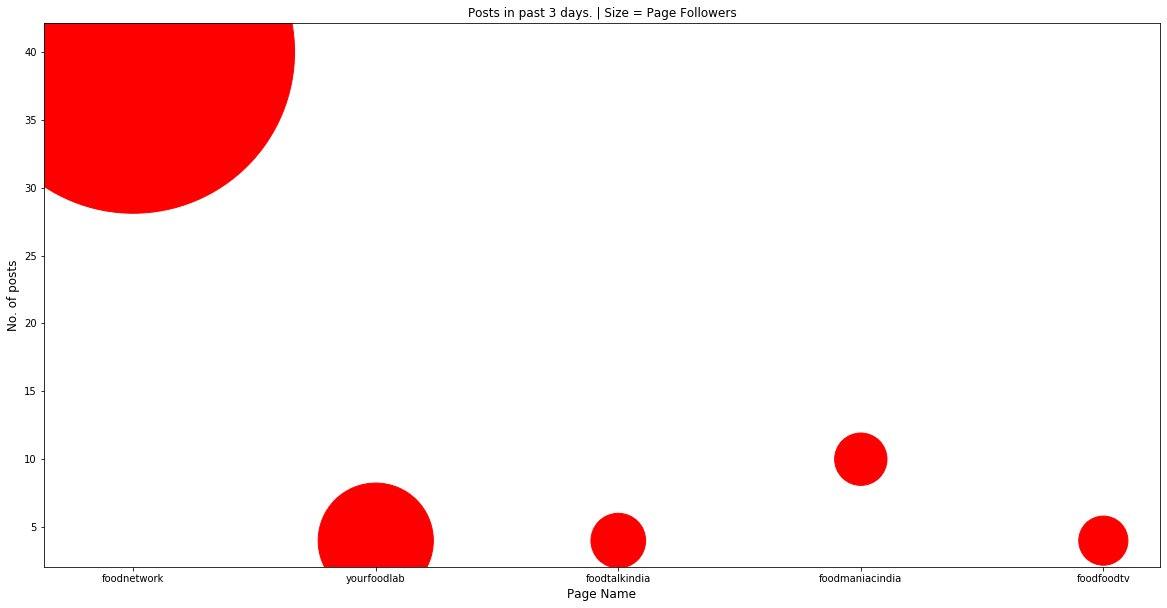

In [36]:
import matplotlib.pyplot as plt

count=[]
page=[]
followers=[]

for i in NoofPosts:
    count.append(i[0])
    
for i in NoofPosts:
    page.append(i[1])

for i in NoofPosts:
    followers.append(i[2]//100)
    
year = [2012, 2013, 2014, 2015,2016, 2017]
salary = [12, 13, 14, 17, 19, 20]
population = [100, 120, 180, 250, 300, 370]
plt.scatter(page, count, s=followers, c = 'r')
plt.title("Posts in past 3 days. | Size = Page Followers")
plt.xlabel('Page Name',fontsize="12")
plt.ylabel('No. of posts',fontsize="12")
plt.rcParams['figure.figsize'] = [20,10]

plt.show()

### 1.	Open the 5 handles obtained and scrapes the content of the first 10 posts of each handle.

### 2.	Prepares a list of all words used in all the scraped posts and calculates the frequency of each word.

In [27]:
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup

word = dict()
hashtags = dict()


for looper in range(5):
    driver.get(NoFollowers[looper][1])
    ans = driver.find_elements_by_xpath('//div[@class="_9AhH0"]')

    for i in range(10):
        ans[i].click()
        wait = WebDriverWait(driver, 50)
        wait.until(EC.presence_of_element_located((By.XPATH, 
                                              '//div[@class="o-MQd  z8cbW"]')))
        btn = driver.find_elements_by_xpath('//button[@class="wpO6b "]')
        a = driver.find_element_by_class_name("C4VMK")
        j = a.find_elements_by_tag_name('span')
        #print(j[1].get_attribute('outerHTML'))
        data=''
        if len(j) == 3:
            data = BeautifulSoup(j[2].get_attribute('outerHTML'))
        else:
            data = BeautifulSoup(j[1].get_attribute('outerHTML'))

        for i in data.get_text().split():
            if i in word:
                word[i] += 1
            else:
                word[i] = 1


        for i in data.find_all('a'):
            str1 = i.string
            if str1[0] == '#':
                if str1 in hashtags:
                    hashtags[str1] += 1
                else:
                    hashtags[str1] = 1   


        btn[-1].click()

print(word)



{'Recipe': 4, 'of': 52, 'the': 79, 'Day:': 2, "@TrishaYearwood's": 1, '\u2060No-Bake': 1, 'Chocolate-Pretzel-Peanut': 1, 'Butter': 2, 'Squares': 1, '🍫Click': 1, 'link': 3, 'in': 39, 'our': 6, 'bio': 3, 'to': 58, 'save': 3, 'recipe': 30, 'on': 29, 'your': 39, '@foodnetworkkitchen': 2, 'app!': 2, 'Are': 1, 'you': 27, 'Team': 1, 'Fennel?': 1, 'We': 2, 'know': 3, '@AmySchumer': 1, 'and': 65, 'chef': 1, 'Chris': 1, 'have': 10, 'opinions': 1, '😉': 1, 'Catch': 1, 'all-new': 1, 'episodes': 1, '#AmySchumerLearnsToCook': 1, 'Monday': 2, 'at': 13, '10|9c!': 1, 'Pickling': 1, '101': 1, 'from': 6, '@ChefSymon': 1, '🥒🥒Use': 1, "@ChefSymon's": 1, 'go-to': 1, 'pickling': 1, 'technique': 1, '(just': 1, 'salt,': 1, 'sugar': 1, '+': 1, 'vinegar!)': 1, 'preserve': 1, 'all': 9, 'fresh': 1, 'picks': 2, 'garden': 1, '☀️☀️A': 1, 'new': 5, 'episode': 2, '#SymonDinners': 1, 'is': 39, 'coming': 1, 'up': 8, 'TODAY': 1, '@': 2, '12:30|11:30c.': 1, 'Class': 1, 'Chocolate': 1, 'Coconut': 1, 'Granola': 1, 'Bites': 1,

### 3.	Create a csv file with two columns : the word and its frequency

In [28]:
import pandas as pd

(pd.DataFrame.from_dict(data=word, orient='index')
   .to_csv('dict_file.csv', header=['Frequency']))

In [29]:
print(hashtags)

{'#AmySchumerLearnsToCook': 1, '#SymonDinners': 1, '#Chopped': 1, '#SharkWeek': 1, '#BestThingIEverAte': 1, '#CookWithATwist': 6, '#stayhome': 2, '#staysafe': 2, '#foodie': 7, '#indiancuisine': 6, '#contestalert': 4, '#sanjyotkeer': 4, '#MorphyRichards': 2, '#recipe': 7, '#sandwiches': 1, '#sandwichesofinstagram': 1, '#bombaysandwich': 1, '#foodiesofinstagram': 3, '#foodpics': 1, '#foodlover': 1, '#cravings': 1, '#streetfood': 7, '#comfortfood': 5, '#samosa': 1, '#samosalover': 1, '#chinese': 1, '#foodstagram': 6, '#mumbaifood': 4, '#mumbaistreetfood': 4, '#indianfood': 6, '#recipeoftheday': 1, '#paneer': 1, '#paneerrecipes': 1, '#paneerlove': 1, '#foodporn': 1, '#foodography': 1, '#dhabastyle': 1, '#dhabafood': 1, '#recipes': 1, '#momos': 1, '#momorecipe': 1, '#mumbai_ig': 4, '#mumbaifoodies': 1, '#foodphotos': 1, '#NewInTown': 1, '#HomeGrown': 1, '#Jameson': 1, '#IrishWhiskey': 1, '#AlwaysInToMixIn': 1, '#TrendTalk': 1, '#farzi': 1, '#InternationalBeerDay': 1, '#beerstagram': 1, '#fo

### 4.	Finds the hashtags that were most popular among these bloggers

In [33]:
sorted_x = sorted(hashtags.items(), key=lambda kv: kv[1],reverse=True)
list(sorted_x[:10])

name=[]
value=[]

for i in sorted_x[:5]:
    value.append(i[1])
    name.append(i[0])
    
list(sorted_x[:10])

[('#foodmaniacindia', 10),
 ('#FoodFood', 10),
 ('#foodie', 7),
 ('#recipe', 7),
 ('#streetfood', 7),
 ('#CookWithATwist', 6),
 ('#indiancuisine', 6),
 ('#foodstagram', 6),
 ('#indianfood', 6),
 ('#comfortfood', 5)]

### 5.	Plots a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

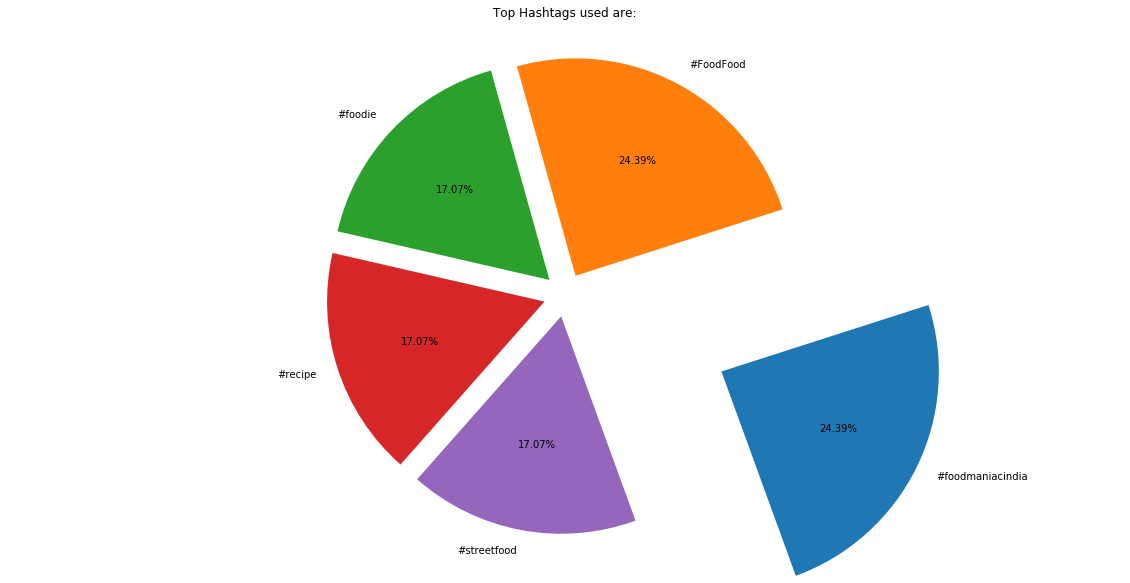

In [37]:
explode2= [0.8, 0.1, 0.1, 0.1, 0.1]
plt.title("Top Hashtags used are:")
plt.axis("equal")
plt.pie(value, labels=name, autopct = "%.2f%%", explode = explode2, startangle=290)
plt.show()